In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [14]:
square = models.Sequential()
#n_zernike = 8
#n_actuators = 51
opt = optimizers.Adam()
square.add(layers.Dense(2, input_shape=[2]))
square.add(layers.Dense(512,activation='relu', kernel_initializer='normal'))
square.add(layers.Dropout(0.5))
square.add(layers.Dense(512, activation='relu', kernel_initializer='normal'))
square.add(layers.Dropout(0.5))
square.add(layers.Dense(1, activation='linear'))
square.compile(loss="mse", optimizer=opt)

In [33]:
%matplotlib inline
x = np.linspace(0, 10, 200).reshape(-1, 1)
y = np.linspace(0, 10, 200).reshape(-1, 1)
xx, yy = np.meshgrid(x, y)
x = xx.reshape(-1, len(x)**2)
y = yy.reshape(-1, len(y)**2)

f = lambda x, y: np.sin(x)*np.cos(y)
z = f(x, y).T
print(np.min(x), np.max(x))
inpu = np.vstack((x, y)).T
print(inpu.shape)

0.0 10.0
(40000, 2)


In [34]:
inp = np.hstack((x, y))
hist = square.fit(inpu, z, batch_size=1000, epochs=100)

Epoch 1/100
40/40 [==============================] - 0s 6ms/step - loss: 0.1615
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1441
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1306
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1186
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1104
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1017
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0944
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0891
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0843
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0790
Epoch 11/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0767
Epoch 12/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0743
Epoch 13/100
40/40 [=================

(2500, 1)


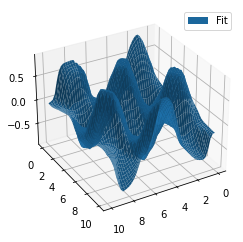

In [36]:
%matplotlib inline
ax = plt.subplot(projection='3d')
x = np.linspace(0, 10).reshape(-1, 1)
y = np.linspace(0, 10).reshape(-1, 1)
xx, yy = np.meshgrid(x, y)
x = xx.reshape(-1, len(x)**2)
y = yy.reshape(-1, len(y)**2)
res = square(np.vstack((x, y)).T)
print(res.shape)
surf = ax.plot_surface(xx, yy, np.array(res).reshape(50, 50), label='Fit')
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d
#surf = ax.plot_surface(xx, yy, f(xx, yy), label='Function')
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d
plt.legend()
ax.view_init(30, 60)

In [160]:
print(f(0.5, 0.5))

0.42073549240394825


In [162]:
print(square(np.array([0.5, 0.5], ndmin=2)))

tf.Tensor([[0.4167465]], shape=(1, 1), dtype=float32)
